In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# allows to import of modules
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
nb_dir
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from pathlib import Path
from torch.utils.data import DataLoader
import torch.nn as nn
import torch

In [5]:
# My modules

In [6]:
from dataset import OTU_2dDataSet
from train import Training
import metrics
import model
import train

## Setup data

In [7]:
DATA_DIR = Path("../../data/OTU_2d")

In [8]:
images_dir = DATA_DIR/'images'
labels_dir = DATA_DIR/'annotations'
train_csv = DATA_DIR/'train_cls.txt'

In [9]:
ds = OTU_2dDataSet(images_dir, labels_dir, train_csv)

In [10]:
len(ds)

1000

In [11]:
im, lbl, fname = ds[200];
im.shape

torch.Size([3, 256, 256])

In [12]:
# import matplotlib.pyplot as plt
# plt.imshow(  (im*255).permute(1, 2, 0)  )

In [13]:
dl = DataLoader(ds, batch_size=4, shuffle=True)

## Metrics

In [14]:
! pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 943.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━

In [15]:
! pip install scikit-learn

In [16]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('../../data/runs/run-8/')

In [17]:
acc =  metrics.Accuracy()
IOU = metrics.IOU()
manager = metrics.MetricManager([acc, IOU], writer)


## Training

In [18]:
n_classes = 1
net = model.ResNetUNet(n_classes)
net.cuda()
1

1

In [19]:
criterion = nn.BCEWithLogitsLoss()
# criterion = nn.BCELoss()


# optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [20]:
trainer = train.Training(manager, criterion, optimizer, dl, 10, net, "../../data/runs/")

In [21]:
trainer.run()

Epoch 1/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 2/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 3/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 4/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 5/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 6/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 7/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 8/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 9/10


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 10/10


  0%|          | 0/250 [00:00<?, ?it/s]

## Inference

In [22]:
import matplotlib.pyplot as plt

In [23]:
import numpy as np

In [24]:
m = nn.Sigmoid().cuda()

In [25]:
im, lbl, fname = ds[208];

In [26]:
fname

'1265.JPG'

In [27]:
pred = m(net((im[None]).cuda()))

In [28]:
imnp = pred[0].detach().cpu().numpy()

In [29]:
np.unique((imnp > 0.8).astype(int))

array([0, 1])

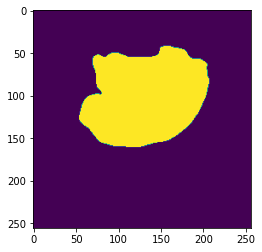

In [30]:
plt.imshow((imnp.reshape((256,256)) > 0.5).astype(int))

In [31]:
lbl.shape

torch.Size([1, 256, 256])

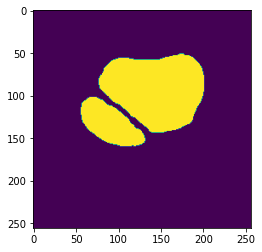

In [32]:
plt.imshow(lbl.numpy().reshape((256,256)))

In [39]:
val_csv = DATA_DIR/'val_cls.txt'
ds_val = OTU_2dDataSet(images_dir, labels_dir, val_csv)


In [49]:
im_v, lbl_v, fname = ds_val[13]

In [50]:
fname

'747.JPG'

In [51]:
m = nn.Sigmoid().cuda()
pred = m(net((im_v[None]).cuda()))

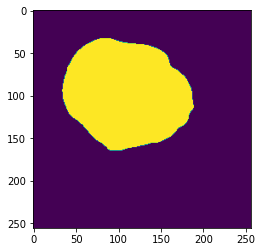

In [52]:
imnp = pred[0].detach().cpu().numpy()
plt.imshow((imnp.reshape((256,256)) > 0.5).astype(int))

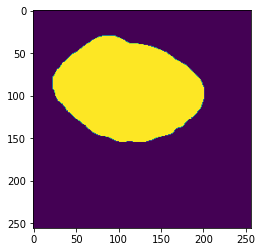

In [53]:
plt.imshow(lbl_v.numpy().reshape((256,256)))

In [ ]:
747-lbl